# Customer Shopping Dataset


The shopping world of Istanbul! Dataset contains shopping information from 10 different shopping malls between 2021 to 2023. Gathered data from various age groups and genders to provide a comprehensive view of shopping habits in Istanbul. The dataset includes essential information such as invoice numbers, customer IDs, age, gender, payment methods, product categories, quantity, price, order dates, and shopping mall locations.

I get this data from kaggle here's the link https://www.kaggle.com/datasets/mehmettahiraslan/customer-shopping-dataset
I hope that this dataset will serve as a valuable resource for research and data analysis I want to gain insights into shopping trends and patterns in Istanbul, want to explore the dataset and discover the fascinating world of Istanbul shopping!

For this the techniques based on Mathematics and Statistics used are: Time Series Analysis, Descriptive Analysis, Regression Analysis

Techniques based on Visualization and Graphs: Bar Chart, Pie Chart, histogram

<img src="dataset-cover.png"/>

## Downloading the Dataset

Here I download the dataset using package "opendatasets". A Python library for downloading datasets from online sources like Kaggle and Google Drive using a simple Python command

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/mehmettahiraslan/customer-shopping-dataset' 

In [3]:
#importing opendatasets library and donloadind the dataset
import opendatasets as od
od.download(dataset_url)

100%|██████████| 1.63M/1.63M [00:01<00:00, 1.05MB/s]

The dataset has been downloaded and extracted.

In [4]:
# reading the dataset
data_dir = './customer-shopping-dataset'

In [5]:
import os
os.listdir(data_dir)

['customer_shopping_data.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
#declaring the name of the project
project_name = "Customer_Shopping"

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [11]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "snamaqbool/customer-shopping" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/snamaqbool/customer-shopping


'https://jovian.com/snamaqbool/customer-shopping'

## Data Preparation and Cleaning

Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

Here I do some data cleaning like knowing the shape of the dataset, some information about columns(e.g data type, changing the data type as required, knowing the null values if present and fixing them and dropping the columns. This all done because I want our dataset to be clean for insights and better result.

#### Attribute Information:

**invoice_no**: Invoice number. Nominal. A combination of the letter 'I' and a 6-digit integer uniquely assigned to each operation.

**customer_id**: Customer number. Nominal. A combination of the letter 'C' and a 6-digit integer uniquely assigned to each operation.

**gender**: String variable of the customer's gender.

**age**: Positive Integer variable of the customers age.

**category**: String variable of the category of the purchased product.

**quantity**: The quantities of each product (item) per transaction. Numeric.

**price**: Unit price. Numeric. Product price per unit in Turkish Liras (TL).

**payment_method**: String variable of the payment method (cash, credit card or debit card) used for the transaction.

**invoice_date**: Invoice date. The day when a transaction was generated.

**shopping_mall**: String variable of the name of the shopping mall where the transaction was made.

In [9]:
#importing the libraries
import pandas as pd
import numpy as np

In [10]:
#reading the csv file
customer_shopping_df = pd.read_csv('customer-shopping-dataset/customer_shopping_data.csv')

In [10]:
#displaying the content of the csv file
customer_shopping_df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [10]:
#displaying number of rows and columns
customer_shopping_df.shape

(99457, 10)

In [21]:
#getting information about the dataset
customer_shopping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [34]:
#displaying the columns only of object datatype
customer_shopping_df.describe(include='object')

,invoice_no,customer_id,gender,category,payment_method,invoice_date,shopping_mall
count,99457,99457,99457,99457,99457,99457,99457
unique,99457,99457,2,8,3,797,10
top,I138884,C241288,Female,Clothing,Cash,24/11/2021,Mall of Istanbul
freq,1,1,59482,34487,44447,159,19943


In [35]:
#knowing is there any null value present in the dataset
customer_shopping_df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [36]:
#dropping unrequired columns
customer_shopping_df.drop(['invoice_no', 'customer_id'], axis = 1, inplace=True)

In [37]:
customer_shopping_df.head()

,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [38]:
customer_shopping_df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [40]:
import jovian

In [14]:
jovian.commit()


<IPython.core.display.Javascript object>

[jovian] Updating notebook "snamaqbool/customer-shopping" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/snamaqbool/customer-shopping


'https://jovian.com/snamaqbool/customer-shopping'

## Exploratory Analysis and Visualization

In this I explores the columns, relationship between them and see that what it describes



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [12]:
#importing libraries
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [13]:
gender = customer_shopping_df['gender'].value_counts(normalize=True)
print(gender)

Female    0.598068
Male      0.401932
Name: gender, dtype: float64


Text(0, 0.5, 'Number of customers')

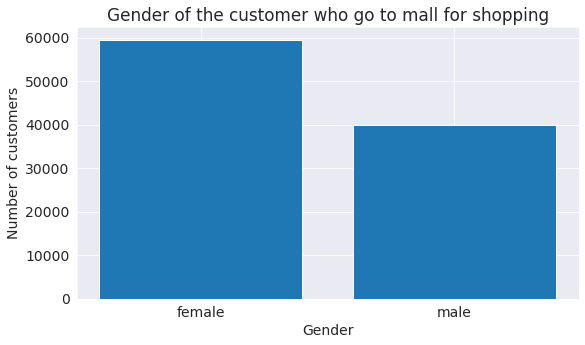

In [14]:
plt.bar(['female', 'male'],customer_shopping_df['gender'].value_counts())
plt.title("Gender of the customer who go to mall for shopping")
plt.xlabel('Gender')
plt.ylabel('Number of customers')

Here, I picked a column name 'gender' to see ho many males and females visit the malls. about 59% females and only 40% males visit the malls.  so we conclude that females are more interested in shopping then males

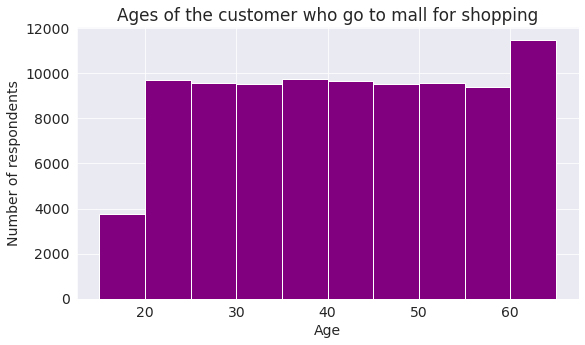

In [11]:
#plt.figure(figsize=(12, 6))
plt.title("Ages of the customer who go to mall for shopping")
plt.xlabel('Age')
plt.ylabel('Number of respondents')

plt.hist(customer_shopping_df.age, bins=np.arange(15,70,5), color='purple');

Here, I took insights of 'age' column to know about which age group is more interested in shopping and which are less.
from the graph we see that the age group between 60 to 65 go more for shopping while less than 20 are less interested in going mall.

In [12]:
mall_count = customer_shopping_df.shopping_mall.value_counts()
mall_count

Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: shopping_mall, dtype: int64

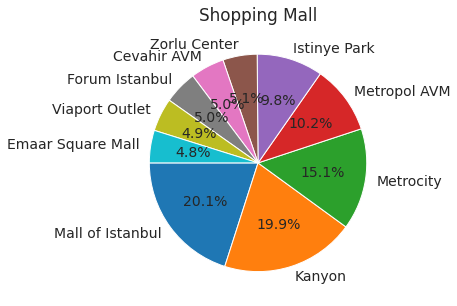

In [43]:
#plt.figure(figsize=(12,6))
plt.title("Shopping Mall")
plt.pie(mall_count, labels=mall_count.index, autopct='%1.1f%%', startangle=180);

In this I took a look on malls. There are total 10 malls on which I'm taking insights. The most famous mall is 'Mall of Istambul' and the least famous mall is 'Emaar Square Mall' in wwhich the least number of people go for shopping.

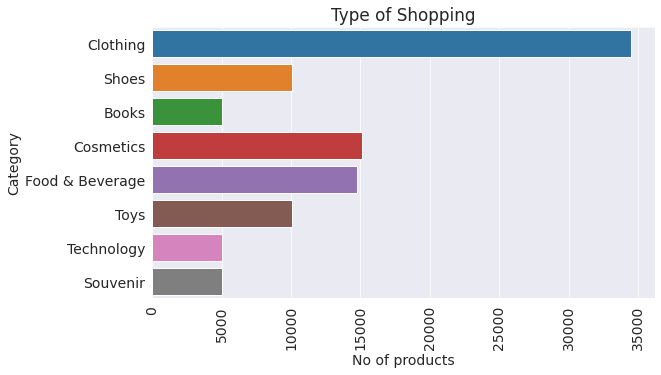

In [17]:
sns.countplot(y=customer_shopping_df.category)
plt.xticks(rotation=90);
plt.title("Type of Shopping")
plt.xlabel('No of products');
plt.ylabel('Category');

In this I did insights of the column 'category'. In which it tells about what type of shopping people usually do in mall. The highest rate is of clothing. Mostly people buy clothes from mall and least selling categories are technology and souvenir.

In [36]:
payment_method_count = customer_shopping_df.payment_method.value_counts()
payment_method_count

Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64

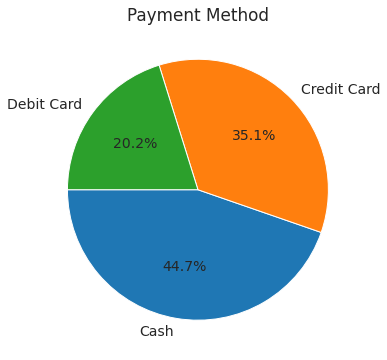

In [38]:
plt.figure(figsize=(12,6))
plt.title("Payment Method")
plt.pie(payment_method_count, labels=payment_method_count.index, autopct='%1.1f%%', startangle=180);

here, I explore the column 'payment method' to know that how many people pay via cash, credit card and debit card. So as we look on a graph we can see that people who pay cash are more other than two. About the percentage of 44.7% over 100. While credit card is second one with the percentage of 35.1% and then Debit card with 20.2%.

Let us save and upload our work to Jovian before continuing

In [14]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

## Asking and Answering Questions

We've already gained several insights about the dataset by exploring individual columns. Let's ask some specific questions and try to answer them using data frame operations and visualizations.



#### Q1: What is the best month for sale?

In [39]:
customer_shopping_df.head()

,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [15]:
#splitting on the basis od "/" and checking 1st index
'2022/05/08'.split('/')[1]

'05'

In [30]:
# Creating a function called month
def month(x):
    return x.split('/')[1]

In [31]:
#passing "invoice_date" and applyiny function to it then creating a new column called "Month"
customer_shopping_df['Month']= customer_shopping_df['invoice_date'].apply(month)

In [32]:
#checking that the column is created
customer_shopping_df.dtypes

invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
Month              object
dtype: object

In [33]:
customer_shopping_df['Month'].unique()

array(['8', '12', '11', '05', '10', '03', '01', '08', '07', '6', '1', '3',
       '02', '5', '06', '04', '7', '9', '2', '4', '09'], dtype=object)

In [34]:
#converting data type object to integer
customer_shopping_df['Month'] = customer_shopping_df['Month'].astype(int)

In [35]:
customer_shopping_df['Month'].unique()

array([ 8, 12, 11,  5, 10,  3,  1,  7,  6,  2,  4,  9])

In [36]:
customer_shopping_df.dtypes

invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
Month               int64
dtype: object

In [40]:
# to gain sales
# Sales = Quantity * Price
customer_shopping_df['sales'] = customer_shopping_df['quantity']*customer_shopping_df['price']
customer_shopping_df.head()

,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,sales
0,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40


In [38]:
# group by on the basis of month and sales and finding the sales
customer_shopping_df.groupby('Month')['sales'].sum()

Month
1     28891525.59
2     26625090.10
3     21956191.33
4     18715685.98
5     19719331.10
6     18933775.30
7     20378722.63
8     19282361.29
9     18795794.91
10    20545090.43
11    18207139.95
12    19455085.64
Name: sales, dtype: float64

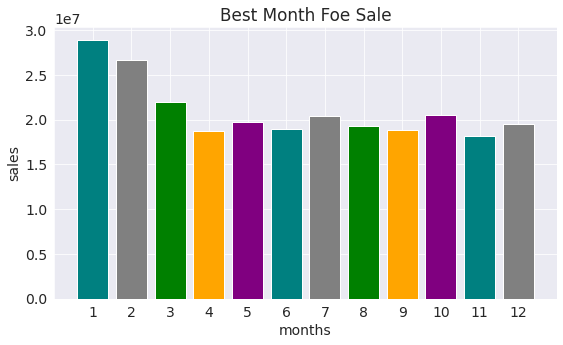

In [52]:
months = range(1,13)
plt.bar(months, customer_shopping_df.groupby('Month')['sales'].sum(), color=['teal', 'grey', 'green', 'orange', 'purple'])
plt.xticks(months)
plt.title('Best Month Foe Sale')
plt.ylabel('sales')
plt.xlabel('months')
plt.show()

"JANUARY" is the best month for sales and month 'February' also has the second highest rating where else the remaining months are average.

#### Q2: Which Mall has maximum order?

In [41]:
customer_shopping_df.head()

,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,sales
0,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40


In [13]:
#shopping mall with max sales 
customer_shopping_df.groupby('shopping_mall')['shopping_mall'].count()

shopping_mall
Cevahir AVM           4991
Emaar Square Mall     4811
Forum Istanbul        4947
Istinye Park          9781
Kanyon               19823
Mall of Istanbul     19943
Metrocity            15011
Metropol AVM         10161
Viaport Outlet        4914
Zorlu Center          5075
Name: shopping_mall, dtype: int64

Text(0.5, 0, 'Sales')

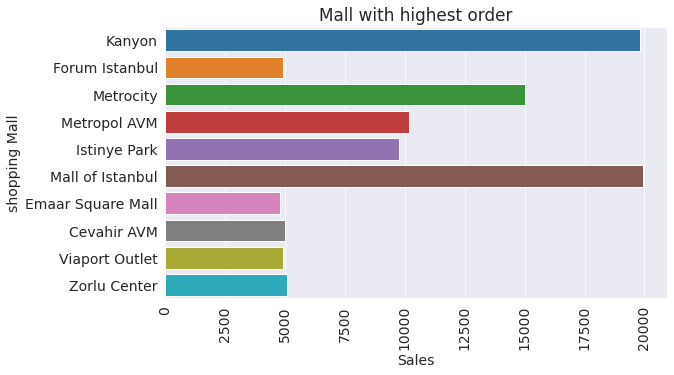

In [28]:
sns.countplot(y=customer_shopping_df.shopping_mall)
plt.xticks(rotation=90);
plt.title("Mall with highest order")
plt.ylabel('shopping Mall');
plt.xlabel('Sales')

'Mall of Istambul' and 'Mall Kanyon' has the maximum sales. Where 'Mall Metrocity' takes best in the sales race. 

#### Q3: Which product category sold the most? and why?

In [42]:
customer_shopping_df.head()

,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,sales
0,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40


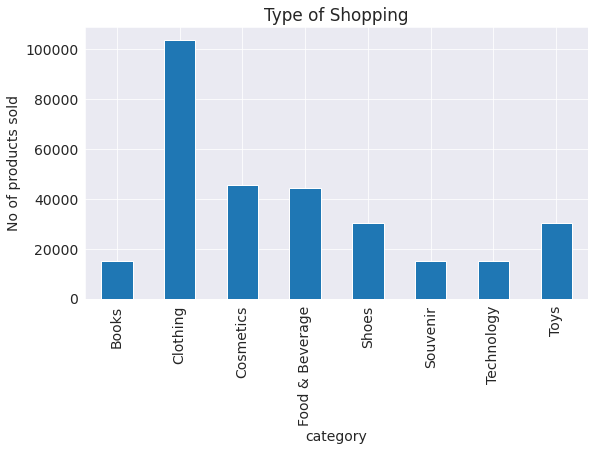

In [23]:
#category that has max sales
customer_shopping_df.groupby('category')['quantity'].sum().plot(kind = 'bar')
plt.title("Type of Shopping")
plt.ylabel('No of products sold');

The biggest selling category is 'Clothing'. People mostly like to buy clothes from the mall.

In [20]:
#mean price for each category
customer_shopping_df.groupby('category')['price'].mean()

category
Books                45.568621
Clothing            901.084021
Cosmetics           122.448626
Food & Beverage      15.671948
Shoes              1807.388568
Souvenir             34.894345
Technology         3156.935548
Toys                107.733185
Name: price, dtype: float64

In [21]:
category= customer_shopping_df.groupby('category')['quantity'].sum().index
quantity= customer_shopping_df.groupby('category')['quantity'].sum()
price=customer_shopping_df.groupby('category')['price'].mean()

/tmp/ipykernel_47/3558894291.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(category, rotation='vertical', size=8)


<Figure size 2880x1728 with 0 Axes>

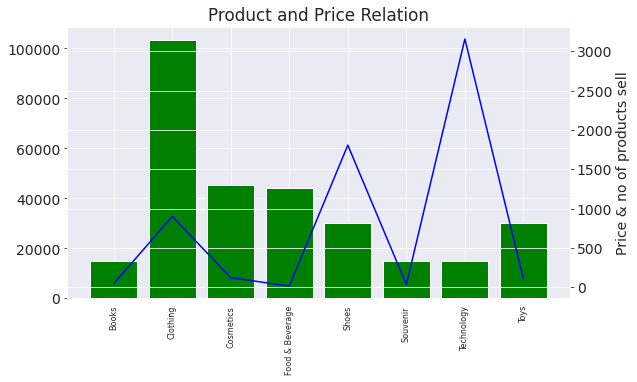

In [22]:
#plotting two charts together to see the relation between them
plt.figure(figsize=(40,24))
fig,ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(category, quantity, color='g')
ax2.plot(category, price, color ='b')
ax1.set_xticklabels(category, rotation='vertical', size=8)
plt.title("Product and Price Relation")
plt.ylabel('Price & no of products sold');
plt.xlabel('Category');

As we know the top selling category is "Clothing" and thats shows a correlation with the price. The cheeper product higher the quantity buy by people and vice versa.

#### Q4: What is the most preferred payment method?

In [43]:
customer_shopping_df.head()

,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,sales
0,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40


In [17]:
payment_method = customer_shopping_df.payment_method.value_counts()

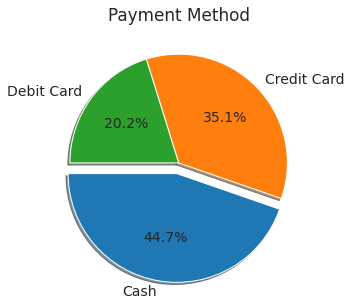

In [18]:
myexplode = [0.1, 0, 0]
plt.title('Payment Method')
plt.pie(payment_method, labels=payment_method.index, autopct='%1.1f%%', startangle=180, explode = myexplode, shadow = True)
plt.show() 

People often pay via Cash with a percentage of 44.7%. After that they pay via credit card that is 35.1% and at last some pay via debit card with percentage of 20.2%.

#### Q5:  Which age group do max shopping? & which gender do maximum shopping?

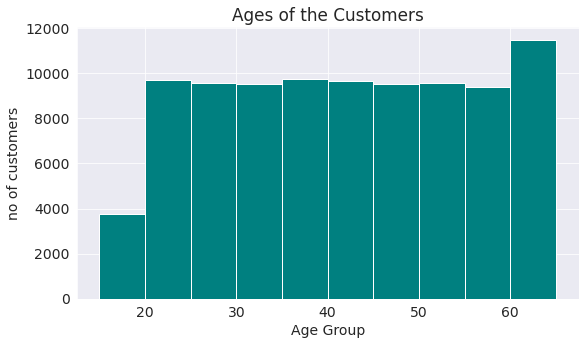

In [13]:
plt.hist(customer_shopping_df.age, bins=np.arange(15,70,5), color='teal');
plt.title("Ages of the Customers")
plt.ylabel('no of customers');
plt.xlabel('Age Group');

The age group 60 to 70 do maximum shopping while all other age group do average shopping.

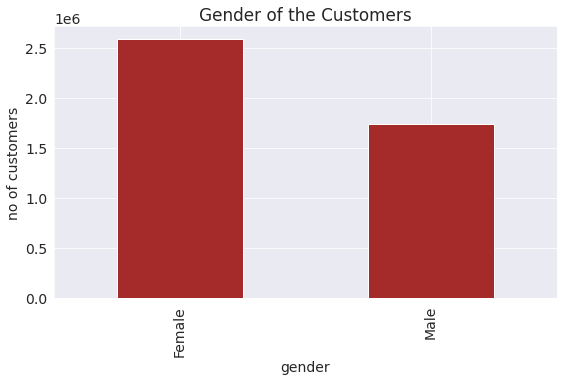

In [14]:
df = customer_shopping_df.groupby('gender')['age'].sum()
df.plot(kind = 'bar', color = 'brown')
plt.title("Gender of the Customers")
plt.ylabel('no of customers');

Females are the most who did shopping at the different shopping malls of Istambul

Let us save and upload our work to Jovian before continuing.

In [31]:
import jovian

In [44]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "snamaqbool/zerotopandas-course-project-starter" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/snamaqbool/zerotopandas-course-project-starter


'https://jovian.com/snamaqbool/zerotopandas-course-project-starter'

## Inferences and Conclusion

We've drawn many inferences from the survey. Here's a summary of a few of them:
- According to the analysis females do the most shopping in Istambul so the they should keep more the female related products.
- Istambul shopping mall is the one which the people lie most and prefer to buy from their. The owner of that mall increased the product their quality to make higher profit.
- At the shopping mall clothing related products are most sailed so malls should keep more clothes to earn more.
- Cheeper the price, maximum selling and vice versa. Product with less price are buy by the people in higher amount than others. 
- People prefer to pay via cash instead of debit card or credit card so the malls facilitate the people while paying with cash. 
- January and February are the months in which people buy the most from malls.

In [47]:
import jovian

In [16]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "snamaqbool/zerotopandas-course-project-starter" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/snamaqbool/zerotopandas-course-project-starter


'https://jovian.com/snamaqbool/zerotopandas-course-project-starter'

## References and Future Work

From this dataset the more analysis can perform by adding more information like order time so that we can find by time at which hour people shop most and at that time advertising can be done to increase sails.
In future it is very helpful.

Following resources to learn more about the dataset and tools used in this notebook:
- Stack Overflow Developer Survey: https://insights.stackoverflow.com/survey
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
- `opendatasets` Python library: https://github.com/JovianML/opendatasets

As a next step, you can try out a project on another dataset of your choice: https://www.kaggle.com/datasets/carrie1/ecommerce-data

In [32]:
import jovian

In [45]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "snamaqbool/zerotopandas-course-project-starter" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/snamaqbool/zerotopandas-course-project-starter


'https://jovian.com/snamaqbool/zerotopandas-course-project-starter'